# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

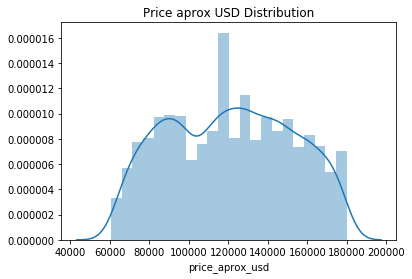

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

#Separamos el dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#Apreciemos gráficamente cómo se encuentra distribuida el feature: price_aprox_usd
sns.distplot(y)
plt.title("Price aprox USD Distribution")
plt.show()

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
tree_r = DecisionTreeRegressor(random_state=42)
model = tree_r.fit(X_train,y_train)

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
y_pred = tree_r.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
rmse_tree = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print("Los valores estimados cuentan con una difencia promedio de USD{} respecto a los valores test reales.".format(rmse_tree))

Los valores estimados cuentan con una difencia promedio de USD26091.27 respecto a los valores test reales.


## __Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [7]:
max_depth_o = tree_r.get_depth()
print("La profundidad máxima del árbol corresponde a {}.".format(max_depth_o))
rmses_train = []
rmses_test = []

for i in range(5,max_depth_o+1,5):
    clf = DecisionTreeRegressor(max_depth=i)
    model = clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_train)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    
    y_pred = clf.predict(X_test)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

#Calculamos el procentaje de error
rmses_train_perc = rmses_train/np.mean(rmses_train)*100
rmses_test_perc = rmses_test/np.mean(rmses_test)*100

La profundidad máxima del árbol corresponde a 30.


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

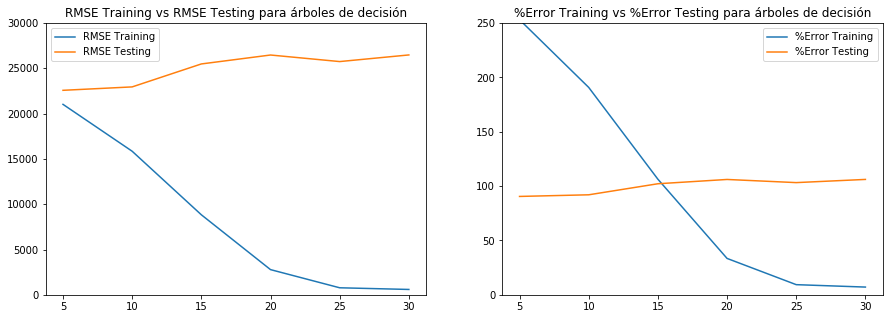

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.setp(ax, xticks = range(5,max_depth_o+1, 5))

ax[0].plot(range(5,max_depth_o+1, 5), rmses_train, label='RMSE Training')
ax[0].plot(range(5,max_depth_o+1, 5), rmses_test, label='RMSE Testing')
ax[0].legend(loc="best")
ax[0].set_ylim((0, 30000))
ax[0].set_title("RMSE Training vs RMSE Testing para árboles de decisión")

ax[1].plot(range(5,max_depth_o+1, 5), rmses_train_perc, label='%Error Training')
ax[1].plot(range(5,max_depth_o+1, 5), rmses_test_perc, label='%Error Testing')
ax[1].set_ylim((0, 2.5*100))
ax[1].set_title("%Error Training vs %Error Testing para árboles de decisión")
ax[1].legend(loc="best")

plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
rmse_knn = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
print("Los valores estimados cuentan con una difencia promedio de USD{} respecto a los valores test reales.".format(rmse_knn))

Los valores estimados cuentan con una difencia promedio de USD24219.93 respecto a los valores test reales.


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [10]:
rmses_train = []
rmses_test = []


for i in range(1,30,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_train)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_train.append(np.sqrt(mean_squared_error(y_train, y_pred)))
    
    y_pred = knn.predict(X_test)
    y_pred.reshape(y_pred.shape[0],1)
    rmses_test.append(np.sqrt(mean_squared_error(y_test, y_pred)))

#Calculamos el procentaje de error
rmses_train_perc = rmses_train/np.mean(rmses_train)*100
rmses_test_perc = rmses_test/np.mean(rmses_test)*100

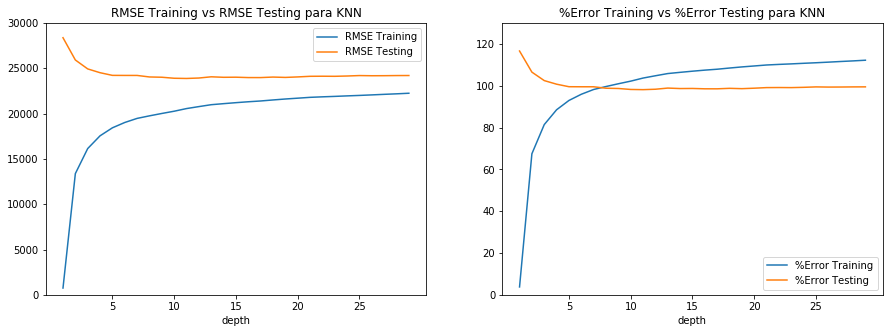

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
plt.setp(ax,xticks=range(5,30, 5))

ax[0].plot(range(1,30, 1), rmses_train, label='RMSE Training')
ax[0].plot(range(1,30, 1), rmses_test, label='RMSE Testing')
ax[0].legend(loc="best")
ax[0].set_ylim((0, 30000))
ax[0].set_title("RMSE Training vs RMSE Testing para KNN")
ax[0].set_xlabel("depth")


ax[1].plot(range(1,30, 1), rmses_train_perc, label='%Error Training')
ax[1].plot(range(1,30, 1), rmses_test_perc, label='%Error Testing')
ax[1].set_ylim((0, 1.3*100))
ax[1].set_title("%Error Training vs %Error Testing para KNN")
ax[1].legend(loc="best")
ax[1].set_xlabel("depth")

plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [13]:
max_depth=5
regressor = DecisionTreeRegressor(max_depth=max_depth)

neg_scores = cross_val_score(regressor, X_train, y_train, scoring = 'neg_mean_squared_error',cv=10)
rmse_mean = round(nmsq2rmse(neg_scores).mean(),2)
print("El promedio del error cuadrático medio corresponde a USD{} para un árbol con una profundidad máxima de {}.".format(
    rmse_mean,max_depth))

El promedio del error cuadrático medio corresponde a USD21594.7 para un árbol con una profundidad máxima de 5.


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [14]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [15]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename(
    'Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [16]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,82000.000,68414.286,13585.714
1,110000.000,115213.125,5213.125
2,80000.000,83877.700,3877.700
3,148000.000,115213.125,32786.875
4,110000.000,130965.454,20965.454
5,145000.000,130965.454,14034.546
6,165000.000,150905.888,14094.112
7,175000.000,150905.888,24094.112
8,169900.000,130965.454,38934.546
9,138000.000,119260.627,18739.373
